In [1]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Radiation Testing\HollandPTC-24_03
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\corrected


In [3]:
file_s1 ='FGDOS_03F_HIGH_B3_3_PASSIVE_Mar_24_21-33-13_s1.csv'
file_s2 ='FGDOS_03F_HIGH_B3_3_PASSIVE_Mar_24_21-33-13_s2.csv'
print(file_s1)
print(file_s2)
df_s1 = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\Arduino_CSV\corrected'+ '\\'+ file_s1 ,engine='python')
df_s2 = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\Arduino_CSV\corrected'+ '\\'+ file_s2 ,engine='python')


FGDOS_03F_HIGH_B3_3_PASSIVE_Mar_24_21-33-13_s1.csv
FGDOS_03F_HIGH_B3_3_PASSIVE_Mar_24_21-33-13_s2.csv


In [13]:
s1 = df_s1.to_numpy()
s2 = df_s2.to_numpy()
df_s1.head()
df_s2.tail()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
1326,389496.5202,2,11,50933,71861,128,7.63,h,1,0
1327,389772.6791,2,11,51139,71861,128,7.63,h,1,0
1328,390051.1726,2,11,51193,71861,128,7.63,h,1,0
1329,390328.1966,2,11,51116,71861,128,7.63,h,1,0
1330,390606.5276,2,11,51055,71861,128,7.63,h,1,0


In [6]:
# Passive mode test for sensor 2
energy = 120
dose_rate_air = 0.6  # Gy/min
conv_factor = 0.906   # LET protons in Si / Air @ energy
dose_rate_Si = dose_rate_air * conv_factor

In [8]:
s2[s2[:,3]<90000]

array([[0.9622, 2, 83, ..., 'h', 0, 0],
       [274.5833, 2, 83, ..., 'h', 0, 0],
       [553.1638, 2, 83, ..., 'h', 0, 0],
       ...,
       [390051.1726, 2, 11, ..., 'h', 1, 0],
       [390328.1966, 2, 11, ..., 'h', 1, 0],
       [390606.5276, 2, 11, ..., 'h', 1, 0]], dtype=object)

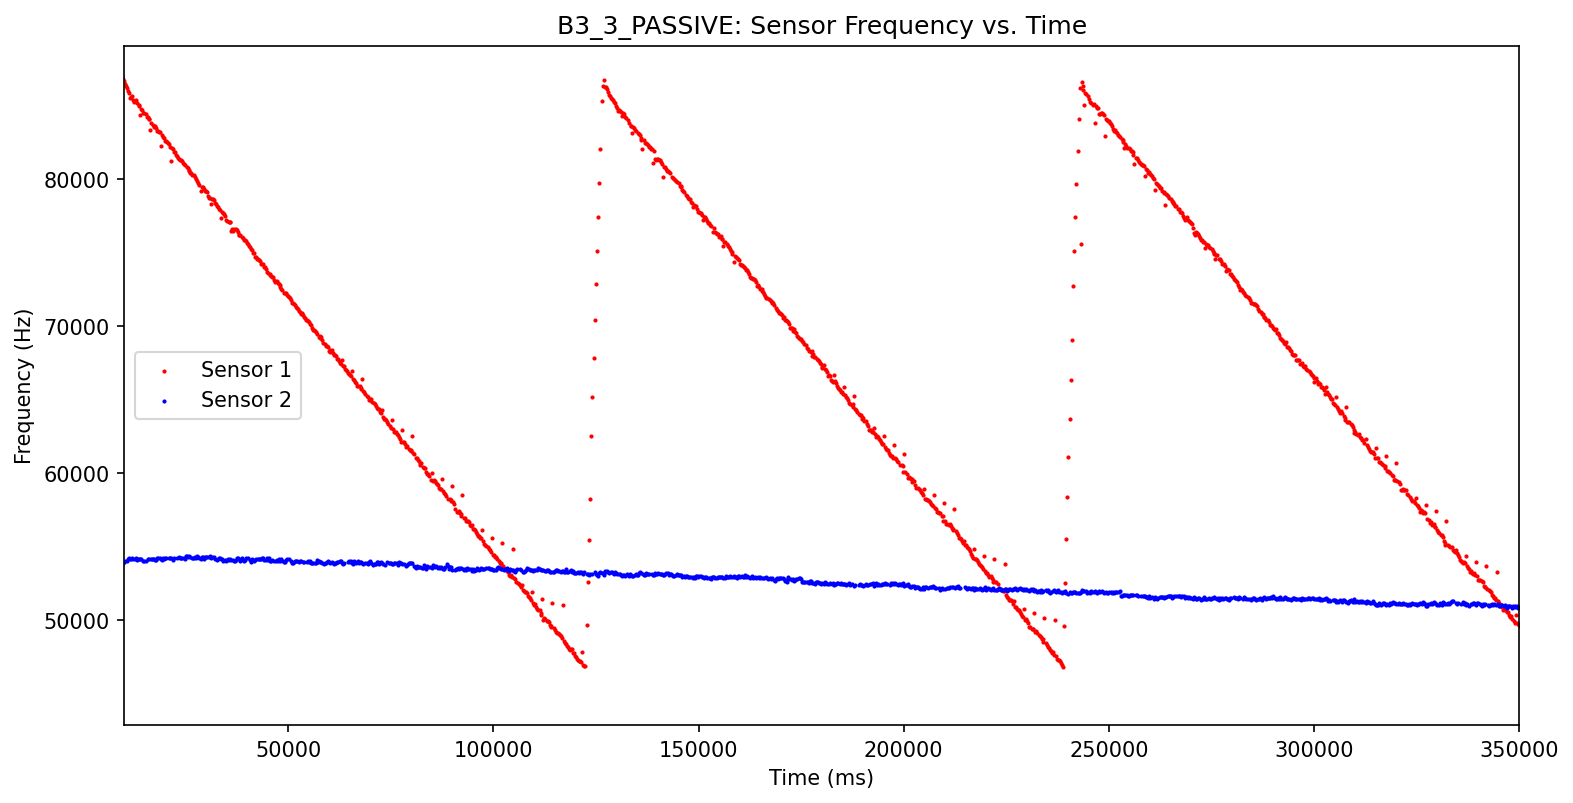

In [24]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(0.1e5,3.5e5)
#plt.xlim(ll_1,ul_1)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("B3_3_PASSIVE: Sensor Frequency vs. Time")
plt.show()

In [20]:
# Sensor 1 irradiation intervals
#s1[(s1[:,0]> 6.2e4) & (s1[:,0]< 9e4)]
ll_1 = 0.1e5
ul_1 = 1.1e5
zone_1 = s1[(s1[:,0]> ll_1) & (s1[:,0]< ul_1)]

ll_2 = 1.4e5
ul_2 = 2.3e5
zone_2 = s1[(s1[:,0]> ll_2) & (s1[:,0]< ul_2)]

In [21]:
# Sensitivity Sensor 1 - Overall
model_s1 = LinearRegression()
t = s1[1:,0].reshape(-1, 1)
s_freq = s1[1:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.06762425950688622
intercept: [71063.01279748]
slope: [[-0.02547165]]
Sensor 1 sensitivity in kHz/Gy:  [[2.81144039]]


In [22]:
# Sensitivity Sensor 1 - Zone 1
model_s1 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.999479138935008
intercept: [89552.25031293]
slope: [[-0.35049195]]
Sensor 1 sensitivity in kHz/Gy:  [[38.68564563]]


In [23]:
# Sensitivity Sensor 1 - Zone 2
model_s1 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9993210886053183
intercept: [130167.66349643]
slope: [[-0.34913191]]
Sensor 1 sensitivity in kHz/Gy:  [[38.53553039]]


In [25]:
# Sensor 2 irradiation intervals
ll_1 = 0.1e5
ul_1 = 3.5e5
zone_1 = s2[(s2[:,0]> ll_1) & (s2[:,0]< ul_1)]

ll_2 = 1.0e5
ul_2 = 2.1e5
zone_2 = s2[(s2[:,0]> ll_2) & (s2[:,0]< ul_2)]

In [26]:
# Sensitivity Sensor 2 - Overall
model_s2 = LinearRegression()
t = s2[1:,0].reshape(-1, 1)
s_freq = s2[1:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.7913578243581167
intercept: [54404.77285745]
slope: [[-0.00990423]]
Sensor 2 sensitivity in kHz/Gy:  [[1.09318242]]


In [27]:
# Sensitivity Sensor 2 - Zone 1
model_s2 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9892016225372736
intercept: [54491.67599933]
slope: [[-0.01055782]]
Sensor 2 sensitivity in kHz/Gy:  [[1.16532257]]


In [28]:
# Sensitivity Sensor 2 - Zone 2
model_s2 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)
print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9433225902436229
intercept: [54672.81764085]
slope: [[-0.01165715]]
Sensor 2 sensitivity in kHz/Gy:  [[1.28666078]]


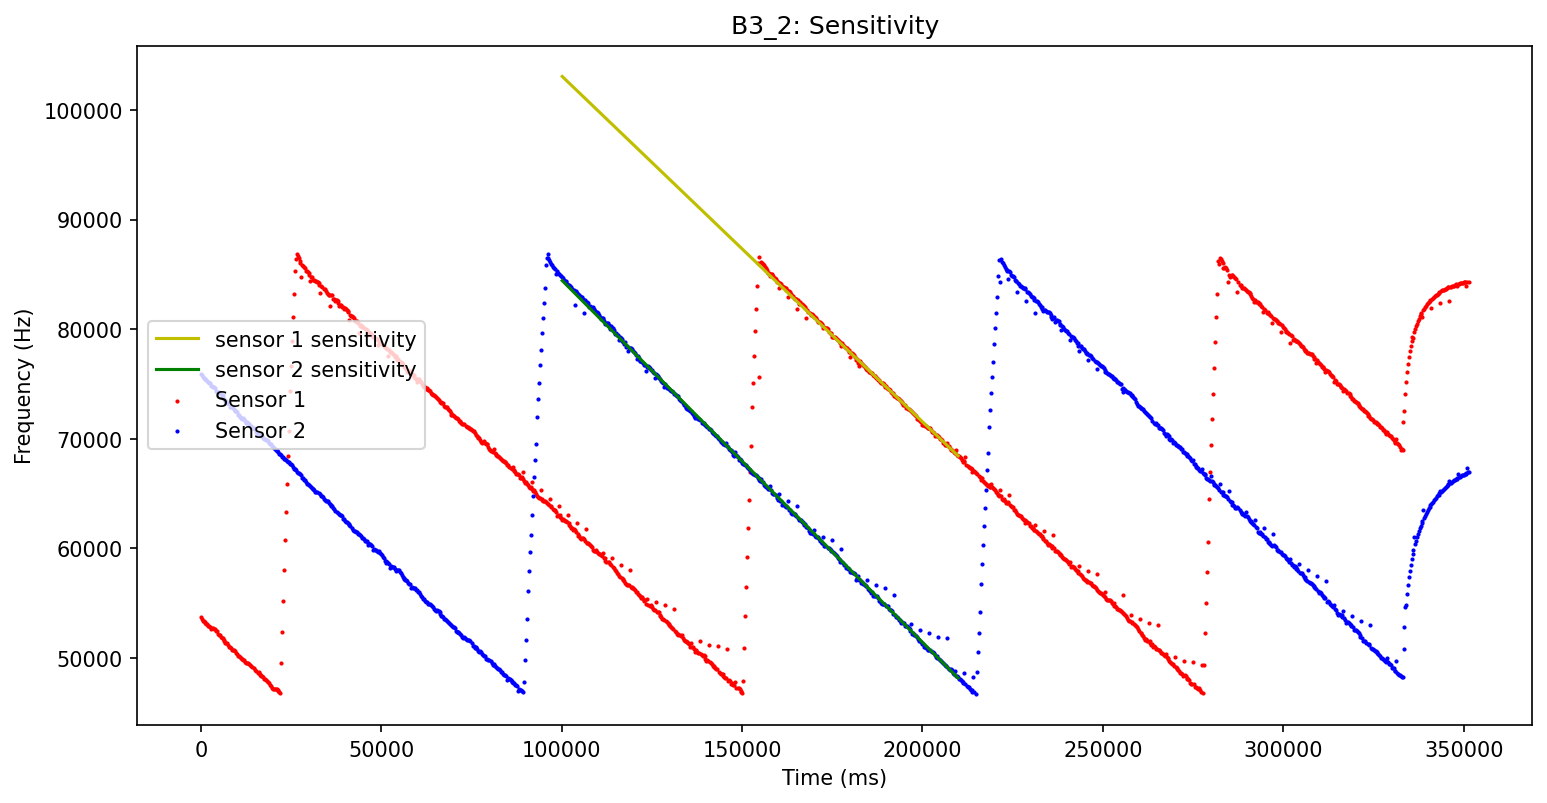

In [25]:
# Plot the linear regression lines
intercept_s1 = model_s1.intercept_
slope_s1 = model_s1.coef_
sensi_s1 = intercept_s1 + t*slope_s1

intercept_s2 = model_s2.intercept_
slope_s2 = model_s2.coef_
sensi_s2 = intercept_s2 + t*slope_s2

fig_sensitivity_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')
plt.plot(t,sensi_s1,'y-',label='sensor 1 sensitivity')
plt.plot(t,sensi_s2,'g-',label='sensor 2 sensitivity')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_2: Sensitivity")
plt.show()

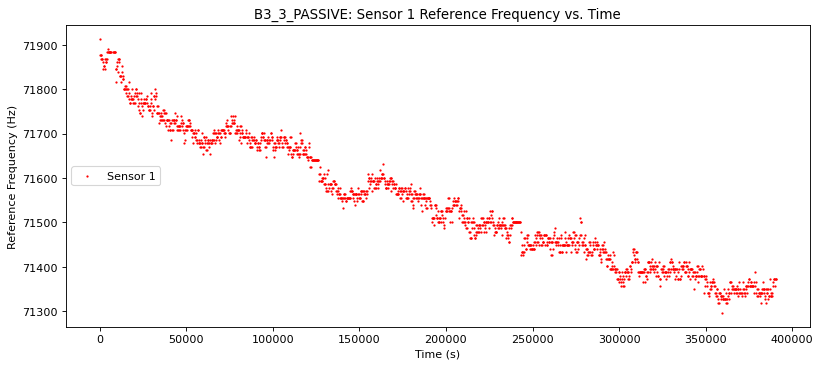

min:  71296
max:  71914
range:  618
mean:  71547.16862745098


In [10]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], s1[:,4],s=1, c='r', label = 'Sensor 1')
#plt.scatter(s2[1:,0], s2[1:,4],s=1,label = 'Sensor 2')
#plt.plot(B4_PRE_TEST[1:,0], B4_PRE_TEST[1:,4],"g-",label = 'Reference frequency')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_3_PASSIVE: Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',s1[:,4].min())
print('max: ',s1[:,4].max())
print('range: ',s1[:,4].max()-s1[:,4].min())
print('mean: ',s1[:,4].mean())

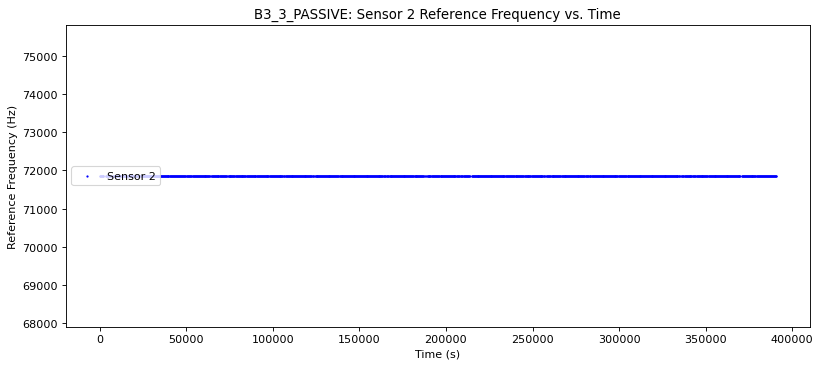

min:  71861
max:  71861
range:  0
mean:  71861.0


In [11]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2[:,0], s2[:,4],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_3_PASSIVE: Sensor 2 Reference Frequency vs. Time")
plt.show()

print('min: ',s2[:,4].min())
print('max: ',s2[:,4].max())
print('range: ',s2[:,4].max()-s2[:,4].min())
print('mean: ',s2[:,4].mean())

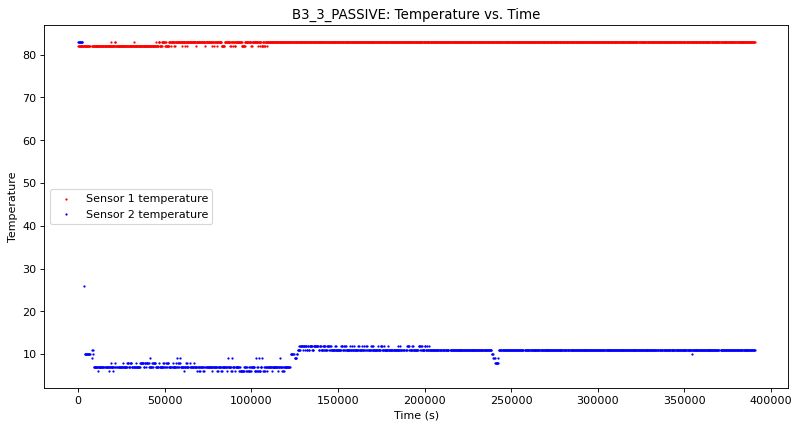

In [12]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s1[:,0], s1[:,2],s=1,c='r',label = 'Sensor 1 temperature')
plt.scatter(s2[:,0], s2[:,2],s=1,c='b',label = 'Sensor 2 temperature')

plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("B3_3_PASSIVE: Temperature vs. Time")
plt.show()

In [16]:
s1[:,0].shape
        

(1388,)

In [28]:
#s1[(s1[:,0]> 3e5)]